# Cost Projections

Based on the Annual Technology Baseline from NREL

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "serif"

import os
target_folder = "../report/img/"
if not os.path.isdir(target_folder):
    os.mkdir(target_folder)

NREL ATB gives the per kw and per kwh costs for batteries -- in Temoa I specify 4 hours of energy storage volume.

In [2]:
batt_4_IC = [1633,1544,1455,1365,1274,1184,1094,1004,967,929,892,855,817,807,797,787,776,766,756,746,736,725,715,705,695,684,674,664,654,644,633,623,613]

## Fixed OM Cost (M\$/MW-year)

In [25]:
fixed_df = pd.read_csv("../fixed_cost_projections.csv", parse_dates=True, index_col='year')
fixed_df

,UtilityPV,ResPV,Nuclear,LandbasedWind,NaturalGas-CCS,Coal-CCS,Battery
year,,,,,,,
2018-01-01,0.018760,0.022000,0.118988,0.043205,0.026994,0.058242,0.040835
2019-01-01,0.016080,0.021000,0.118988,0.042851,0.026994,0.058242,0.038600
2020-01-01,0.015852,0.019832,0.118988,0.042496,0.026994,0.058242,0.036365
2021-01-01,0.015246,0.018692,0.118988,0.042142,0.026994,0.058242,0.034113
2022-01-01,0.014641,0.017553,0.118988,0.041787,0.026994,0.058242,0.031860
2023-01-01,0.014035,0.016413,0.118988,0.041432,0.026994,0.058242,0.029607
2024-01-01,0.013429,0.015273,0.118988,0.041078,0.026994,0.058242,0.027355
2025-01-01,0.012824,0.014133,0.118988,0.040723,0.026994,0.058242,0.025102
2026-01-01,0.012218,0.012994,0.118988,0.040368,0.026994,0.058242,0.024168


In [26]:
import datetime as dt

In [27]:
years = np.arange(2000,2061,1).astype('int')
n = np.arange(0,61,1)
my_dict = {'year':years,
           'nyear':n}
dummy_df = pd.DataFrame(my_dict)
dummy_df.index = pd.to_datetime(dummy_df.year, format='%Y')

In [28]:
frames = [fixed_df, dummy_df]
new_df = pd.concat(frames, axis=1)
new_df

,UtilityPV,ResPV,Nuclear,LandbasedWind,NaturalGas-CCS,Coal-CCS,Battery,year,nyear
year,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,0
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,2
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,3
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,4
...,...,...,...,...,...,...,...,...,...
2056-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2056,56
2057-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2057,57
2058-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2058,58


In [29]:
new_df=new_df.bfill()
new_df

,UtilityPV,ResPV,Nuclear,LandbasedWind,NaturalGas-CCS,Coal-CCS,Battery,year,nyear
year,,,,,,,,,
2000-01-01,0.01876,0.022,0.118988,0.043205,0.026994,0.058242,0.040835,2000,0
2001-01-01,0.01876,0.022,0.118988,0.043205,0.026994,0.058242,0.040835,2001,1
2002-01-01,0.01876,0.022,0.118988,0.043205,0.026994,0.058242,0.040835,2002,2
2003-01-01,0.01876,0.022,0.118988,0.043205,0.026994,0.058242,0.040835,2003,3
2004-01-01,0.01876,0.022,0.118988,0.043205,0.026994,0.058242,0.040835,2004,4
...,...,...,...,...,...,...,...,...,...
2056-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2056,56
2057-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2057,57
2058-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2058,58


In [30]:
new_df=new_df.ffill()

In [31]:
new_df

,UtilityPV,ResPV,Nuclear,LandbasedWind,NaturalGas-CCS,Coal-CCS,Battery,year,nyear
year,,,,,,,,,
2000-01-01,0.018760,0.022000,0.118988,0.043205,0.026994,0.058242,0.040835,2000,0
2001-01-01,0.018760,0.022000,0.118988,0.043205,0.026994,0.058242,0.040835,2001,1
2002-01-01,0.018760,0.022000,0.118988,0.043205,0.026994,0.058242,0.040835,2002,2
2003-01-01,0.018760,0.022000,0.118988,0.043205,0.026994,0.058242,0.040835,2003,3
2004-01-01,0.018760,0.022000,0.118988,0.043205,0.026994,0.058242,0.040835,2004,4
...,...,...,...,...,...,...,...,...,...
2056-01-01,0.008055,0.006432,0.118988,0.033107,0.026994,0.058242,0.015323,2056,56
2057-01-01,0.008055,0.006432,0.118988,0.033107,0.026994,0.058242,0.015323,2057,57
2058-01-01,0.008055,0.006432,0.118988,0.033107,0.026994,0.058242,0.015323,2058,58


In [32]:
new_df.drop(columns=['year', 'nyear'], inplace=True)

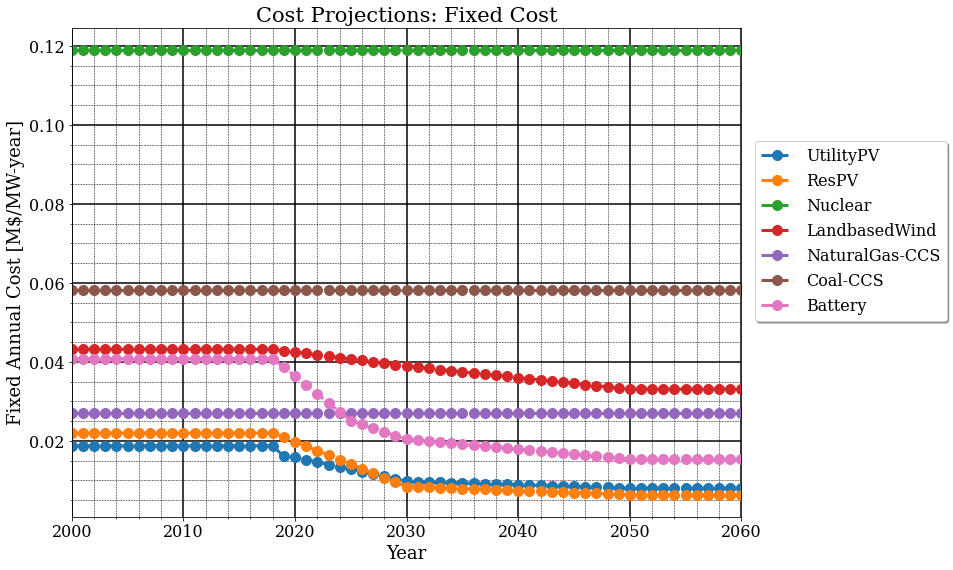

In [33]:
new_df.plot(figsize=(12,9), lw=3, marker='o', markersize=10, linestyle='--')
plt.title("Cost Projections: Fixed Cost", fontsize=21)
plt.ylabel(r"Fixed Annual Cost [M$/MW-year]", fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.legend(loc=(1.02, 0.4), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 16})
# plt.savefig(target_folder+'fixedcost_projection')
plt.show()

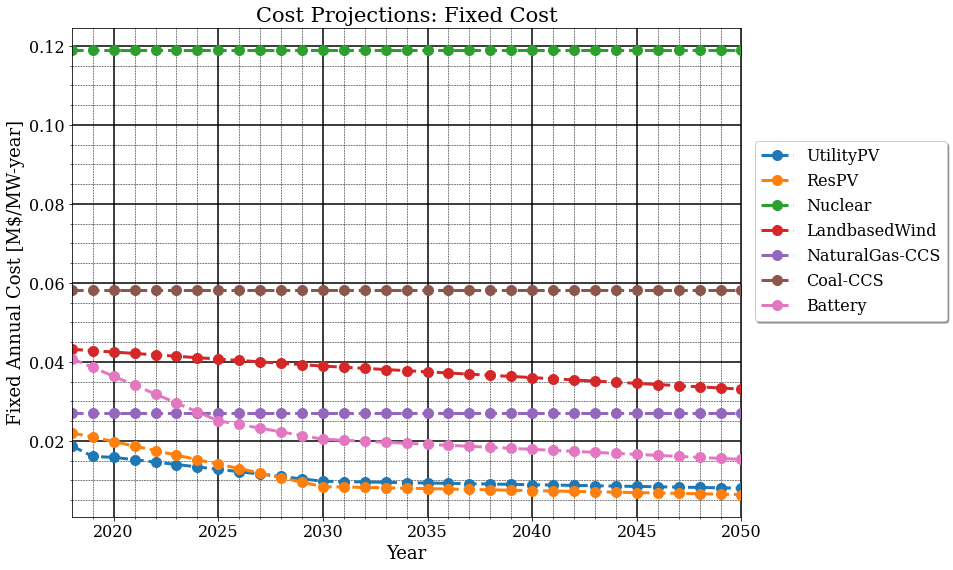

In [34]:
fixed_df.plot(figsize=(12,9), lw=3, marker='o', markersize=10, linestyle='--')
plt.title("Cost Projections: Fixed Cost", fontsize=21)
plt.ylabel(r"Fixed Annual Cost [M$/MW-year]", fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.legend(loc=(1.02, 0.4), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 16})
# plt.savefig(target_folder+'fixedcost_projection')
plt.show()
# plt.grid()

In [35]:
new_df.to_csv('../fixed_cost_projections_bfill.csv')

## Investment Cost (\$/kW)

In [15]:
invest_df = pd.read_csv("../capital_cost_projections.csv", parse_dates=True, index_col='year')
invest_df

,LandbasedWind,Utility PV,Res PV,Coal-CCS,Nuclear,NaturalGas-CCS,Battery
year,,,,,,,
2018-01-01,1845.548882,1565.881911,3054.318209,5930.664535,6124.727764,2665.878343,962.685308
2019-01-01,1816.400831,1375.377679,2796.245071,5908.502697,6093.459971,2626.958400,910.000000
2020-01-01,1785.981289,1324.761493,2644.278663,5886.340860,6062.192178,2588.038456,857.314692
2021-01-01,1754.290255,1274.145307,2492.312255,5864.179022,6030.924384,2549.118513,804.207582
2022-01-01,1721.327730,1223.529121,2340.345847,5842.017185,5999.656591,2510.198570,751.100472
2023-01-01,1687.093712,1172.912935,2188.379439,5819.855347,5968.388798,2471.278626,697.993361
2024-01-01,1651.588202,1122.296749,2036.413031,5797.693510,5937.121005,2414.306406,644.886251
2025-01-01,1614.811200,1071.680563,1884.446623,5760.686742,5905.853211,2373.975431,591.779141
2026-01-01,1576.762706,1021.064377,1732.480214,5735.381561,5874.585418,2345.714396,569.755174


In [16]:
invest_df['Battery'] = batt_4_IC
invest_df

,LandbasedWind,Utility PV,Res PV,Coal-CCS,Nuclear,NaturalGas-CCS,Battery
year,,,,,,,
2018-01-01,1845.548882,1565.881911,3054.318209,5930.664535,6124.727764,2665.878343,1633
2019-01-01,1816.400831,1375.377679,2796.245071,5908.502697,6093.459971,2626.958400,1544
2020-01-01,1785.981289,1324.761493,2644.278663,5886.340860,6062.192178,2588.038456,1455
2021-01-01,1754.290255,1274.145307,2492.312255,5864.179022,6030.924384,2549.118513,1365
2022-01-01,1721.327730,1223.529121,2340.345847,5842.017185,5999.656591,2510.198570,1274
2023-01-01,1687.093712,1172.912935,2188.379439,5819.855347,5968.388798,2471.278626,1184
2024-01-01,1651.588202,1122.296749,2036.413031,5797.693510,5937.121005,2414.306406,1094
2025-01-01,1614.811200,1071.680563,1884.446623,5760.686742,5905.853211,2373.975431,1004
2026-01-01,1576.762706,1021.064377,1732.480214,5735.381561,5874.585418,2345.714396,967


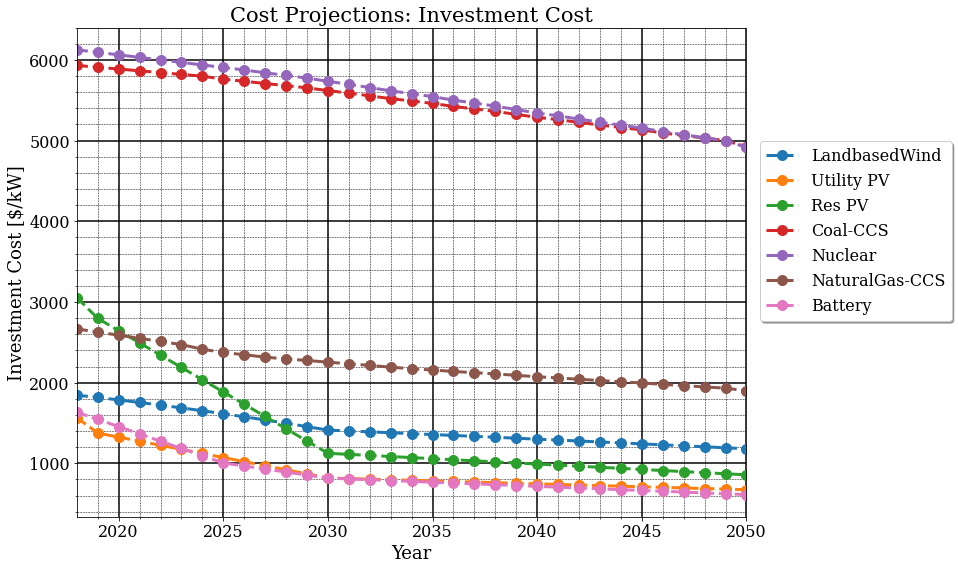

In [17]:
# invest_df.plot(figsize=(12,9))
invest_df.plot(figsize=(12,9), lw=3, marker='o', markersize=10, linestyle='--')
plt.title("Cost Projections: Investment Cost", fontsize=21)
plt.ylabel(r"Investment Cost [$/kW]", fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.legend(loc=(1.02, 0.4), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 16})
# plt.savefig(target_folder+'investcost_projection')
plt.show()

In [18]:
dollars_to_mdollars = 1e-6
frames = [invest_df, dummy_df]
new_df = pd.concat(frames, axis=1)
new_df.drop(columns=['year', 'nyear'], inplace=True)
new_df=new_df.bfill()
kW_to_MW = 1e3
new_df=new_df*kW_to_MW*dollars_to_mdollars
new_df

,LandbasedWind,Utility PV,Res PV,Coal-CCS,Nuclear,NaturalGas-CCS,Battery
year,,,,,,,
2000-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2001-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2002-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2003-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2004-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
...,...,...,...,...,...,...,...
2056-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
new_df=new_df.ffill()
new_df

,LandbasedWind,Utility PV,Res PV,Coal-CCS,Nuclear,NaturalGas-CCS,Battery
year,,,,,,,
2000-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2001-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2002-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2003-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2004-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
...,...,...,...,...,...,...,...
2056-01-01,1.180627,0.673166,0.857657,4.924613,4.916458,1.899098,0.613
2057-01-01,1.180627,0.673166,0.857657,4.924613,4.916458,1.899098,0.613
2058-01-01,1.180627,0.673166,0.857657,4.924613,4.916458,1.899098,0.613


In [20]:
new_df.columns

Index(['LandbasedWind', 'Utility PV', 'Res PV', 'Coal-CCS', 'Nuclear',
       'NaturalGas-CCS', 'Battery'],
      dtype='object')

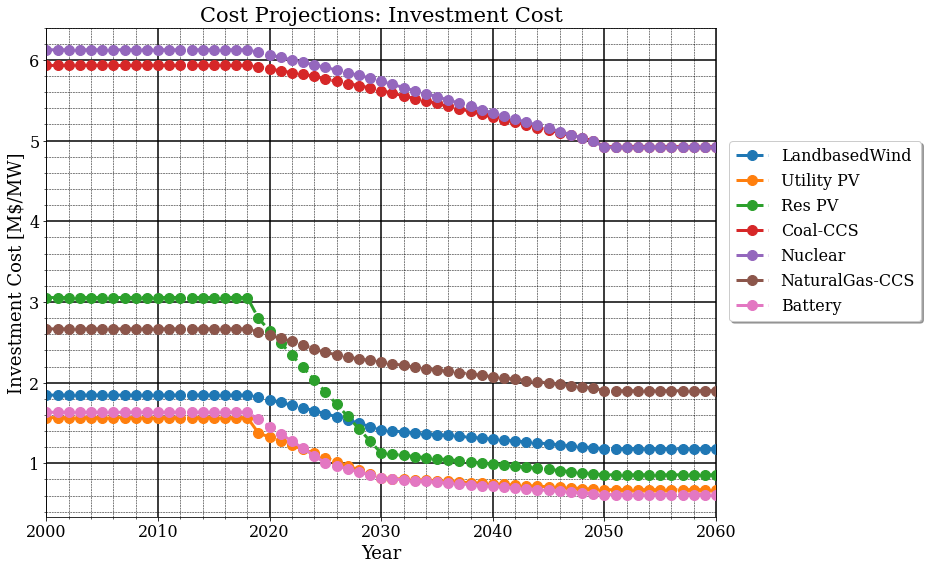

In [21]:
# invest_df.plot(figsize=(12,9))
new_df.plot(figsize=(12,9), lw=3, marker='o', markersize=10, linestyle='--')
plt.title("Cost Projections: Investment Cost", fontsize=21)
plt.ylabel(r"Investment Cost [M$/MW]", fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.minorticks_on()
plt.grid(which='major',linestyle='-', linewidth='1.5', color='black')
plt.grid(which='minor',linestyle='--', linewidth='0.5', color='black')
plt.legend(loc=(1.02, 0.4), fancybox=True, shadow=True,
              fontsize=12, prop={'size': 16})
# plt.savefig(target_folder+'investcost_projection')
plt.show()

In [22]:
new_df.to_csv('../capital_cost_projections_bfill.csv')

In [23]:
new_df

,LandbasedWind,Utility PV,Res PV,Coal-CCS,Nuclear,NaturalGas-CCS,Battery
year,,,,,,,
2000-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2001-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2002-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2003-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
2004-01-01,1.845549,1.565882,3.054318,5.930665,6.124728,2.665878,1.633
...,...,...,...,...,...,...,...
2056-01-01,1.180627,0.673166,0.857657,4.924613,4.916458,1.899098,0.613
2057-01-01,1.180627,0.673166,0.857657,4.924613,4.916458,1.899098,0.613
2058-01-01,1.180627,0.673166,0.857657,4.924613,4.916458,1.899098,0.613


The battery duration we want is about around 4.87 hours, based on the HOMER analysis.

What's the cost projection for that? Once again, all data comes from NREL Annual Technology Baseline

In [24]:
# values for each year in the simulation
duration = 4.87
battery_energy_cost = np.array([280,206,168,157,147,136])
battery_power_cost = np.array([244,179,146,137,128,119])
battery_energy_cost*duration+battery_power_cost

array([1607.6 , 1182.22,  964.16,  901.59,  843.89,  781.32])